In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\Mall_customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.rename(columns ={'Annual Income (k$)':'Income',
                    'Spending Score (1-100)':'Score',
                   'Genre':'Gender'},inplace = True)
          

In [5]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [6]:
df.drop(columns =['CustomerID','Gender','Age'],inplace = True)

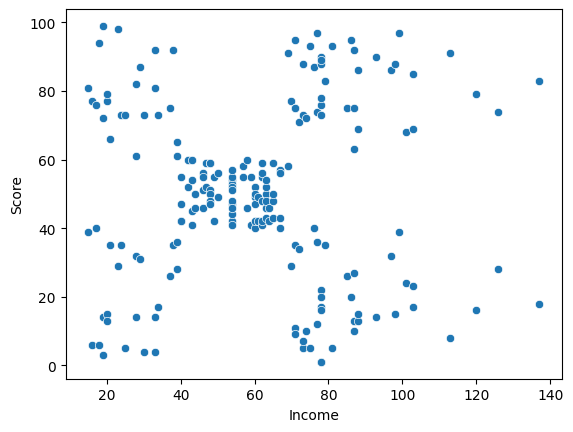

In [7]:
sns.scatterplot(x = 'Income',y= 'Score',data = df)
plt.show()

In [8]:
X = df
X

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Convert DataFrame to NumPy array and scale
X = df.values  # Convert to NumPy array
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features

# Run K-Means clustering
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)  # Use scaled data
    wcss.append(kmeans.inertia_)

print(wcss)


[400.0, 273.66888662642015, 157.70400815035947, 109.22822707921347, 65.56840815571681, 60.13287487193422, 49.66824483736798, 37.319122878338824, 32.49508119910091, 30.05932269404221]


In [10]:
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=['number'])  # Remove non-numeric columns
X = StandardScaler().fit_transform(X)  # Scale data (optional but recommended)
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

**1. kmeans clustering**

In [11]:
wcss = []
for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k,init ='k-means++')
    kmeans.fit(X)
    # wcss.append(kmeans.inertia_)
    wcss.append(kmeans.inertia_)  # Correct spelling


print(wcss)

[400.0, 270.1559035072792, 157.70400815035947, 109.22822707921347, 65.57885579985047, 60.142847541849136, 46.824819382648364, 37.197786918695634, 32.82802898718322, 32.90978638075536]


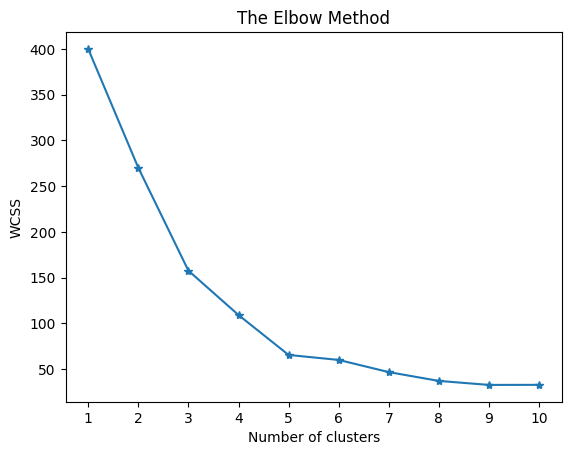

In [12]:
# using the elbow method 
plt.plot(range(1,11),wcss,marker = '*')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5 , init = 'k-means++',random_state = True)

# fit & predict 
df['km_cluster']=kmeans.fit_predict(X)

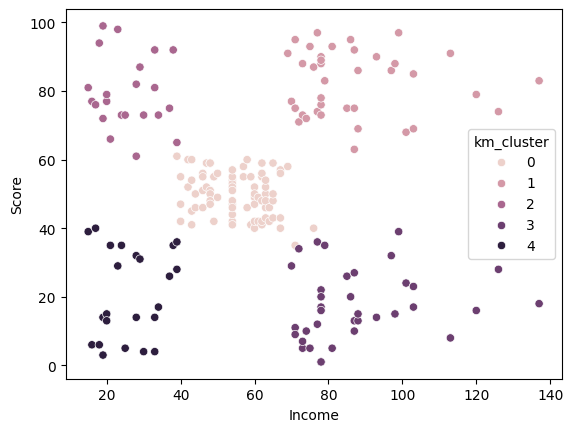

In [21]:
sns.scatterplot(x='Income',y= 'Score',hue =df['km_cluster'],data = df)
plt.show()

**2.Hierarchical Clustering**

- identifying the optimal number of cluster using Dendrogrm

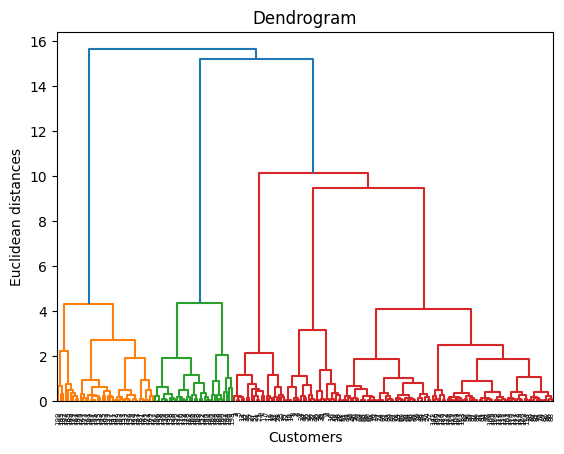

In [24]:
import scipy.cluster.hierarchy as sch
data = sch.linkage(X,method = 'ward')

dendrogram = sch.dendrogram(data)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**hierarchical Clustering Model**

In [28]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5,linkage = 'ward')

# fit & predict 
hc.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

<Axes: xlabel='Income', ylabel='Score'>

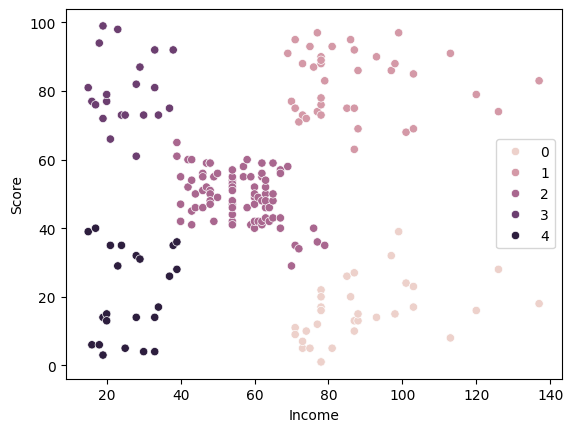

In [29]:
sns.scatterplot(x = 'Income',y = 'Score',hue = hc.fit_predict(X),data =df)

**DBSCAN Clustering**

In [35]:
for  r in range(1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs = DBSCAN( eps = r,min_samples = m)
        df['db_cluster']=dbs.fit_predict(X)
    if  df['db_cluster'].unique() == 5:
        break

print('eps:',r)
print('min:',m)

eps: 9
min: 9


In [36]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 8,min_samples = 9)

df['db_cluster'] = dbs.fit_predict(X)

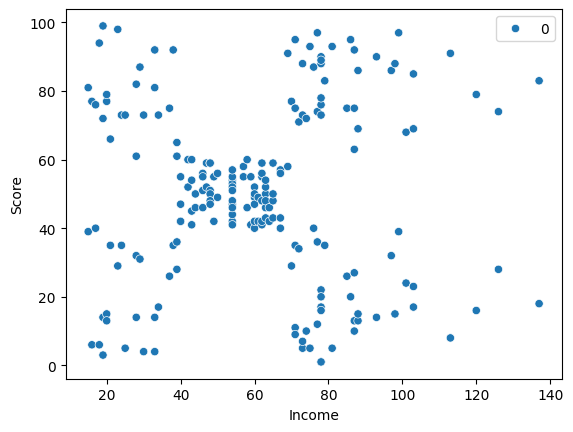

In [45]:
sns.scatterplot(x ='Income',y = 'Score',hue = dbs.fit_predict(X),data = df)
plt.show()